In [87]:
import sys
if sys.platform.startswith('linux'): # or win
    print("in linux")
    file_path = "/home/ncslaber/109-2/tree_experiment/npy_depth/p_1_45_10frame"

in linux


In [6]:
'''math tool'''
import csv
import numpy as np

'''plot tool'''
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator
import matplotlib.ticker as ticker

'''image tool'''
import cv2
# import pyrealsense2 as rs
import statistics # as sta

In [94]:
'''load file'''
npDepth = np.load("/home/ncslaber/109-2/tree_experiment/npy_depth/p_1_45_center/21_0.npy")
color = cv2.imread(file_path+'/color_img/21.0.jpg')

height,width = npDepth.shape
npDepthF = cv2.convertScaleAbs(npDepth, alpha=0.085) # 6m

'''threshold depth'''
npDepth_binary = np.copy(npDepth)
npDepth_binary = npDepth_binary.astype('float32')

ret, npDepth_binary1 = cv2.threshold(npDepth_binary, 3000, 255, cv2.THRESH_BINARY_INV)
ret, npDepth_binary2 = cv2.threshold(npDepth_binary, 1500, 255, cv2.THRESH_BINARY)
npDepth_binary1 = npDepth_binary1.astype('uint8')
npDepth_binary2 = npDepth_binary2.astype('uint8')

npDepth_binary = cv2.bitwise_and(npDepth_binary1, npDepth_binary2)
npDepth_binary = npDepth_binary.astype('uint8')

'''thresdhold height'''
cx_d = 328 #424
cy_d = 241 #241
fx_d = 617 #424
fy_d = 617 #424
npPointX = np.asarray(range(640))-cx_d
npPointX = np.diag(npPointX)
npPointX = npDepth.dot(npPointX)/ fx_d * (-1)

npPointY = np.asarray(range(480))-cy_d
npPointY = np.diag(npPointY)

theta = 0/180*np.pi
npPointY = npPointY.dot(npDepth)/ fy_d * (-1) 
npPointY = npPointY*np.cos(theta) + npDepth * np.sin(theta) + 360
npPointY = npPointY.astype('float16')

npHeight_binary = np.copy(npPointY)
npHeight_binary = npHeight_binary.astype('float32')

ret, npHeight_binary = cv2.threshold(npHeight_binary, -200, 255, cv2.THRESH_BINARY)
npHeight_binary = npHeight_binary.astype('uint8')

''''''
npTreeMask = cv2.bitwise_and(npDepth_binary, npHeight_binary)
mask = np.zeros_like(npTreeMask)
region_of_interest_vertices = [(0,height/2),(0, height),(width, height),(width,height/2)]
cv2.fillPoly(mask, np.array([region_of_interest_vertices], np.int32), 255)
npTreeMask = cv2.bitwise_and(npTreeMask, mask)

npTreeMask_c = cv2.cvtColor(npTreeMask, cv2.COLOR_GRAY2BGR)
npTreeMask_c = cv2.addWeighted(npTreeMask_c, 0.5, color, (0.4), 0.0)

contours, hierarchy = cv2.findContours(npTreeMask,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE) 
npDepthF_copy = np.copy(npDepthF)
npDepthF_copy = cv2.cvtColor(npDepthF_copy, cv2.COLOR_GRAY2BGR)

'''extract the only obj'''
allObj_plot = np.zeros(npDepth.shape, dtype='uint8')
moments = []
index = []
objSizeBound = 8000
i = 0
for ct in contours:
    obj_plot = np.zeros(npDepth.shape, dtype='uint8')
    cv2.fillPoly(obj_plot, [ct], 255)
#     cv2.imshow('obj',obj_plot)
#     cv2.waitKey(10)
    m = cv2.moments(ct)
    if m["m00"] > objSizeBound:
        cv2.fillPoly(allObj_plot, [ct], 255)
        moments.append(m)
        index.append(i)
    i = i+1
        
if len(index) != 0:
    (x, y, w, h) = cv2.boundingRect(contours[index[0]])
    print(w/h)
    if w/h < 2:
        print("here")
        cv2.rectangle(npTreeMask_c, (x, y), (x + w, y + h), (0, 255, 0), 2)
        m = moments[0]
        cX = int(m['m10'] / m['m00'])
        cY = int(m['m01'] / m['m00'])
        cv2.circle(npDepthF_copy, (cX, cY), 10, (1, 227, 254), -1)
else:
    print("no tree")

npBinarFuse = cv2.addWeighted(npDepth_binary, 0.7, npHeight_binary, (0.4), 0.0)

# npDepth_binary, npHeight_binary, npTreeMask_c, npDepthF_copy

3.646551724137931


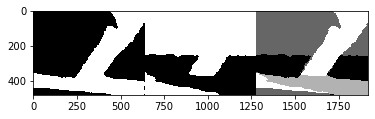

In [95]:
p1 = np.hstack((npDepth_binary,npHeight_binary, npBinarFuse))
plt.imshow(cv2.cvtColor(p1,cv2.COLOR_BGR2RGB))

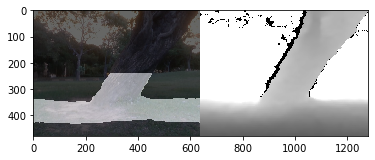

In [93]:
p2 = np.hstack((npTreeMask_c, npDepthF_copy))
plt.imshow(cv2.cvtColor(p2,cv2.COLOR_BGR2RGB))

In [77]:
'''Show all contours'''
for i in range(len(contours)):
    M = cv2.moments(contours[i])
    print(M["m00"], M["m10"], M["m01"])

16337.0 5653607.166666666 4727540.666666666


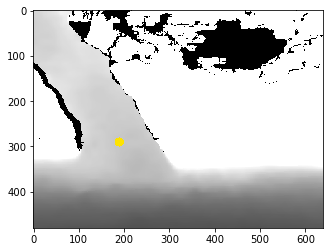

In [70]:
plt.imshow(cv2.cvtColor(npDepthF_copy,cv2.COLOR_BGR2RGB))

In [79]:
(x, y, w, h) 

(237, 240, 223, 102)